# Exploratory Data Analysis
Creted by: Pat Pascual

## Data Dictionary
### Numerical Features
| Variable | Description |
|----------|-------------|
| Feature_ae_0 | Customer - Age of the customer |
| Feature_dn_1 | Telematics - Latest call duration (in seconds), measured during last sales call |
| Feature_cn_2 | Telematics - Number of call attempts made to the customer |
| Feature_ps_3 | Telematics - Number of days since last campaign (999 = no previous campaign) |
| Feature_ps_4 | Telematics - Number of call attempts made for previous campaign |
| Feature_ee_5 | Macro variable - Employment variation rate (Quarterly) |
| Feature_cx_6 | Macro variable - Consumer price index (Monthly) |
| Feature_cx_7 | Macro variable - Consumer confidence index (Monthly) |
| Feature_em_8 | Macro variable - 3 month interbank rate (Quarterly) |
| Feature_nd_9 | Macro variable - Number of employees (Quarterly) |


### Categorical Features
| Variable | Description |
|----------|-------------|
| Feature_jd_10 | Customer - Type of employment |
| Feature_md_11 | Customer - Civil status |
| Feature_ed_12 | Customer - Highest level of education |
| Feature_dd_13 | Customer - Has credit facility in default |
| Feature_hd_14 | Customer - Has a home loan |
| Feature_ld_15 | Customer - Has a personal loan |
| Feature_cd_16 | Customer - Contact medium |
| Feature_md_17 | Telematics - Month when last contacted |
| Feature_dd_18 | Telematics - Day of week when last contacted |
| Feature_pd_19 | Performance - Outcome of previous campaign |

### Response Variable
| Variable | Description |
|----------|-------------|
| Response | Did customer take up offer (1 = Yes, 0 = No) |

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [33]:
# Set display options
pd.set_option('display.max_columns', None)
sns.set_theme() 

In [34]:
# Read the dataset
df = pd.read_csv('dataset.csv', sep='|')

In [35]:
df.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,Feature_jd_10,Feature_md_11,Feature_ed_12,Feature_dd_13,Feature_hd_14,Feature_ld_15,Feature_cd_16,Feature_md_17,Feature_dd_18,Feature_pd_19,Response
0,57,371,1,999,1,-1.8,92.893,-46.2,1.299,5099.1,Cat_9_t***n,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_2_y***s,Cat_0_c***r,Cat_6_m***y,Cat_1_m***n,Cat_0_f***e,0
1,55,285,2,999,0,1.1,93.994,-36.4,4.860,5191.0,Cat_11_u***n,Cat_1_m***d,Cat_7_u***n,Cat_1_u***n,Cat_2_y***s,Cat_0_n***o,Cat_1_t***e,Cat_6_m***y,Cat_2_t***u,Cat_1_n***t,0
2,33,52,1,999,1,-1.8,92.893,-46.2,1.313,5099.1,Cat_1_b***r,Cat_1_m***d,Cat_2_b***y,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_6_m***y,Cat_0_f***i,Cat_0_f***e,0
3,36,355,4,999,0,1.4,94.465,-41.8,4.967,5228.1,Cat_0_a***.,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_1_t***e,Cat_4_j***n,Cat_0_f***i,Cat_1_n***t,0
4,27,189,2,999,0,1.4,93.918,-42.7,4.963,5228.1,Cat_3_h***d,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_0_f***i,Cat_1_n***t,0


In [36]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (35000, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Feature_ae_0   35000 non-null  int64  
 1   Feature_dn_1   35000 non-null  int64  
 2   Feature_cn_2   35000 non-null  int64  
 3   Feature_ps_3   35000 non-null  int64  
 4   Feature_ps_4   35000 non-null  int64  
 5   Feature_ee_5   35000 non-null  float64
 6   Feature_cx_6   35000 non-null  float64
 7   Feature_cx_7   35000 non-null  float64
 8   Feature_em_8   35000 non-null  float64
 9   Feature_nd_9   35000 non-null  float64
 10  Feature_jd_10  35000 non-null  object 
 11  Feature_md_11  35000 non-null  object 
 12  Feature_ed_12  35000 non-null  object 
 13  Feature_dd_13  35000 non-null  object 
 14  Feature_hd_14  35000 non-null  object 
 15  Feature_ld_15  35000 non-null  object 
 16  Feature_cd_16  35000 non-null  object 
 17  Feature_

In [37]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Feature_ae_0     0
Feature_dn_1     0
Feature_cn_2     0
Feature_ps_3     0
Feature_ps_4     0
Feature_ee_5     0
Feature_cx_6     0
Feature_cx_7     0
Feature_em_8     0
Feature_nd_9     0
Feature_jd_10    0
Feature_md_11    0
Feature_ed_12    0
Feature_dd_13    0
Feature_hd_14    0
Feature_ld_15    0
Feature_cd_16    0
Feature_md_17    0
Feature_dd_18    0
Feature_pd_19    0
Response         0
dtype: int64

In [38]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Display duplicate rows if any exist
if df.duplicated().sum() > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated()])



Duplicate Rows:
Number of duplicate rows: 11

Duplicate rows:
       Feature_ae_0  Feature_dn_1  Feature_cn_2  Feature_ps_3  Feature_ps_4  \
7217             55            33             1           999             0   
13226            32           128             1           999             0   
15237            35           348             4           999             0   
22628            27           331             2           999             0   
23883            71           120             1           999             0   
25182            45           252             1           999             0   
30101            36            88             1           999             0   
30802            39           124             1           999             0   
31587            41           127             1           999             0   
33631            47            43             3           999             0   
34582            24           114             1           999       

In [39]:
# Drop duplicate rows and store in new dataframe
df = df.drop_duplicates()

# Print number of rows removed
print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows after removing duplicates: 34989


In [40]:
# Drop duplicate rows and store in new dataframe
df = df.drop_duplicates()

# Print number of rows removed
print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows after removing duplicates: 34989


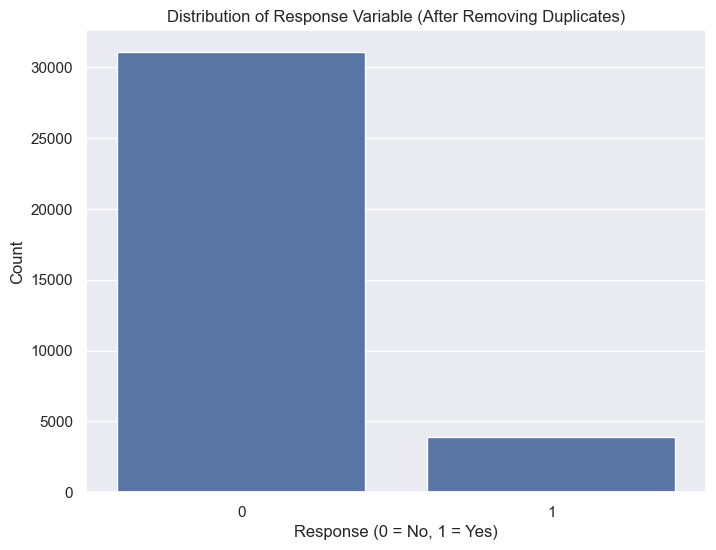

In [41]:
# Response variable distribution (after removing duplicates)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Response')
plt.title('Distribution of Response Variable (After Removing Duplicates)')
plt.xlabel('Response (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [42]:
# Calculate response rate and counts
response_counts = df['Response'].value_counts()
response_rate = (response_counts / len(df) * 100).round(2)
print("\nResponse Rate and Counts:")
print("Response Rate (%):")
print(response_rate)
print("\nResponse Counts:")
print(response_counts)


Response Rate and Counts:
Response Rate (%):
Response
0    88.77
1    11.23
Name: count, dtype: float64

Response Counts:
Response
0    31060
1     3929
Name: count, dtype: int64


In [48]:
# Basic statistics for numerical columns
print("\nNumerical Statistics:")
df.describe()


Numerical Statistics:


,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,Response
count,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000
mean,40.030238,257.870645,2.562520,962.420532,0.173769,0.080785,93.575856,-40.519472,3.619997,5167.038398,0.112292
std,10.427325,258.615788,2.767745,187.040455,0.495074,1.570988,0.578551,4.619486,1.734564,72.170909,0.315730
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


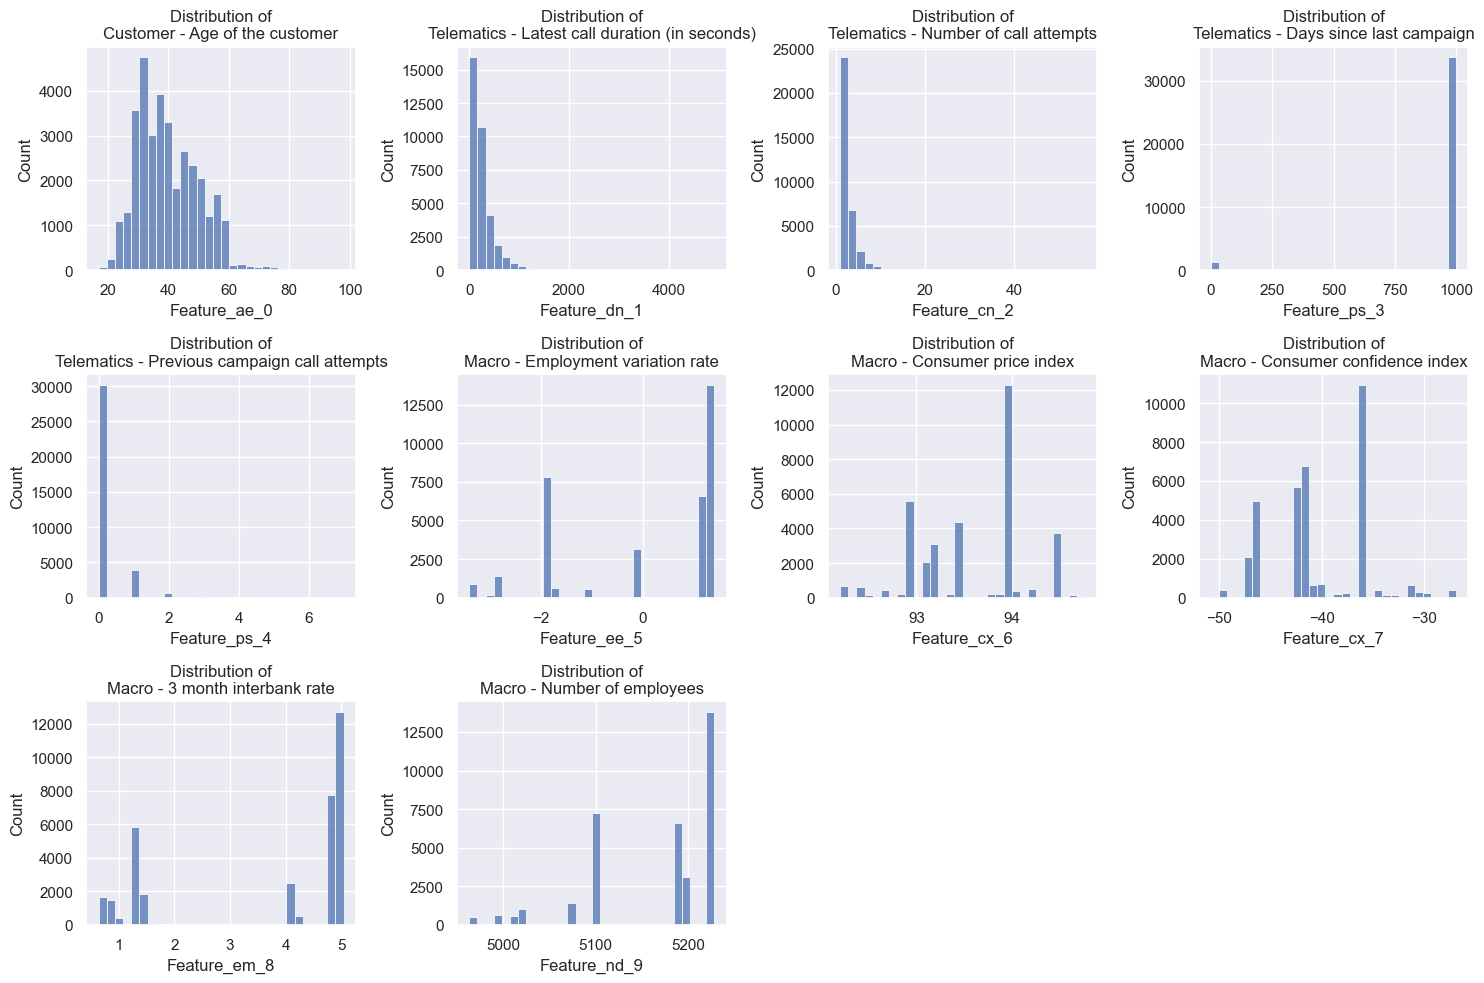

In [43]:
# Numerical features analysis with labels
numerical_features = {
    'Feature_ae_0': 'Customer - Age of the customer',
    'Feature_dn_1': 'Telematics - Latest call duration (in seconds)',
    'Feature_cn_2': 'Telematics - Number of call attempts',
    'Feature_ps_3': 'Telematics - Days since last campaign',
    'Feature_ps_4': 'Telematics - Previous campaign call attempts',
    'Feature_ee_5': 'Macro - Employment variation rate',
    'Feature_cx_6': 'Macro - Consumer price index',
    'Feature_cx_7': 'Macro - Consumer confidence index', 
    'Feature_em_8': 'Macro - 3 month interbank rate',
    'Feature_nd_9': 'Macro - Number of employees'
}

# Distribution plots for numerical features
plt.figure(figsize=(15, 10))
for i, (col, label) in enumerate(numerical_features.items(), 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=col, bins=30)
    plt.title(f'Distribution of\n{label}')
plt.tight_layout()
plt.show()

# Understanding Response Rate Analysis by Feature Bins

## What the Plots Show
These plots visualize how different features influence the likelihood of a customer responding "Yes" (1) or "No" (0) to the campaign.

## How to Read the Plots

### X-Axis (Feature Bins)
- Each feature is divided into 10 equal-sized groups (bins)
- Bin 0 = lowest 10% of values 
- Bin 9 = highest 10% of values

Example: For age (Feature_ae_0)
- Bin 0: Youngest 10% of customers
- Bin 5: Middle-aged customers 
- Bin 9: Oldest 10% of customers

### Y-Axis (Response Rate)
- Shows the proportion of "Yes" responses in each bin
- Range is 0 to 1 (0% to 100%)

Example interpretation:
- Y = 0.2 means:
  - 20% of customers in that bin said "Yes"
  - 80% of customers in that bin said "No"

## Interpreting Patterns

### 1. Flat Line
- Indicates the feature has minimal impact on response rate
- Example: If age shows a flat line, it suggests age doesn't influence campaign success

### 2. Increasing/Decreasing Trend
- Shows the feature influences response likelihood
- Example: Call duration (Feature_dn_1) shows higher response rates for longer calls
- Suggests longer conversations might lead to more successful outcomes

### 3. Sharp Changes
- Indicates potential threshold effects
- Example: If response rate jumps at bin 7 of age
- Might suggest a critical age range where campaign effectiveness changes significantly

C:\Users\RonaldPatrickPascual\AppData\Local\Temp\ipykernel_2172\3769426499.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(pd.qcut(df[col], q=10, duplicates='drop'))['Response'].mean()
C:\Users\RonaldPatrickPascual\AppData\Local\Temp\ipykernel_2172\3769426499.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(pd.qcut(df[col], q=10, duplicates='drop'))['Response'].mean()
C:\Users\RonaldPatrickPascual\AppData\Local\Temp\ipykernel_2172\3769426499.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of

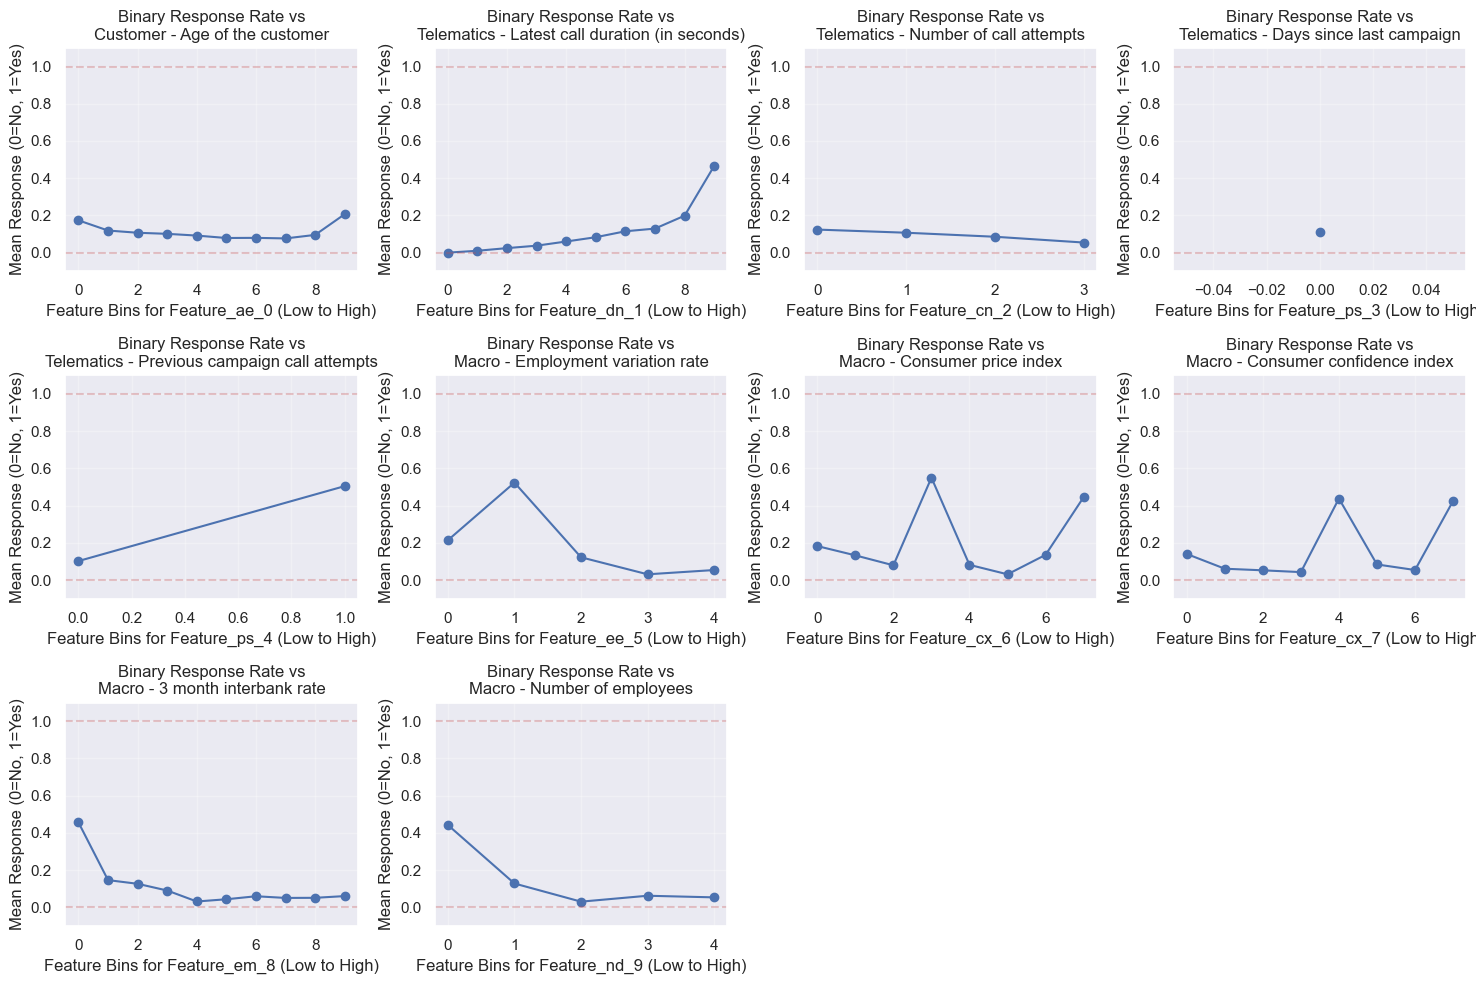

In [44]:
# Analyze numerical features vs response rate (binary 0/1)
plt.figure(figsize=(15, 10))
for i, (col, label) in enumerate(numerical_features.items(), 1):
    plt.subplot(3, 4, i)
    
    # Calculate mean response rate (0/1) for each bin
    df_grouped = df.groupby(pd.qcut(df[col], q=10, duplicates='drop'))['Response'].mean()
    
    # Plot binary response rate by feature bins
    plt.plot(range(len(df_grouped)), df_grouped.values, marker='o')
    
    # Add horizontal lines at 0 and 1 to show binary bounds
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    plt.axhline(y=1, color='r', linestyle='--', alpha=0.3)
    
    # Customize plot
    plt.title(f'Binary Response Rate vs\n{label}')
    plt.xlabel(f'Feature Bins for {col} (Low to High)')
    plt.ylabel('Mean Response (0=No, 1=Yes)')
    plt.ylim(-0.1, 1.1)  # Set y-axis limits to show full 0-1 range
    plt.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

# Interpretation of Response Rate Analysis

## Key Findings by Feature Category

### Customer Demographics
- **Age (Feature_ae_0)**
  - Shows a U-shaped pattern
  - Higher response rates among youngest (bin 0) and oldest (bin 9) customers 
  - Middle-aged customers (bins 4-6) show lowest response rates (~8%)
  - Suggests targeting might be more effective for younger and older age groups

### Telematics (Call-Related Features)
1. **Call Duration (Feature_dn_1)**
   - Strong positive correlation
   - Longer calls (bins 8-9) show significantly higher success rates (~45%)
   - Short calls (bins 0-4) have very low success rates (<10%)
   - Suggests longer engagement with customers is crucial for success

2. **Number of Call Attempts (Feature_cn_2)**
   - Slight negative trend
   - More call attempts correlate with lower success rates
   - Suggests persistence might not improve outcomes
   - Best response rates on earlier attempts

3. **Days Since Last Campaign (Feature_ps_3)**
   - Limited data points visible
   - Suggests timing between campaigns has some impact
   - More analysis needed for conclusive insights

4. **Previous Campaign Call Attempts (Feature_ps_4)**
   - Clear positive trend
   - Higher success rates with more previous campaign attempts
   - Suggests value in following up with previously contacted customers

### Macro-Economic Indicators
1. **Employment Variation Rate (Feature_ee_5)**
   - Spike at bin 1, then declining trend
   - Suggests better success during moderate employment growth

2. **Consumer Price Index (Feature_cx_6)**
   - Volatile pattern
   - Peak at bin 3 (~50% success rate)
   - Suggests certain economic conditions are more favorable

3. **Consumer Confidence Index (Feature_cx_7)**
   - Multiple peaks (bins 4 and 6)
   - Complex relationship with success rate
   - Might indicate optimal timing windows based on consumer sentiment

4. **3-Month Interbank Rate (Feature_em_8)**
   - Strong negative correlation
   - Highest success rates at lowest rates (bin 0, ~45%)
   - Suggests campaigns are more successful during low interest rate periods

5. **Number of Employees (Feature_nd_9)**
   - Clear negative trend
   - Best performance during lower employment periods
   - Might indicate timing opportunities during certain economic cycles

In [45]:
# Categorical features analysis
categorical_features = [
    'Feature_jd_10', 'Feature_md_11', 'Feature_ed_12', 'Feature_dd_13',
    'Feature_hd_14', 'Feature_ld_15', 'Feature_cd_16', 'Feature_md_17',
    'Feature_dd_18', 'Feature_pd_19'
]

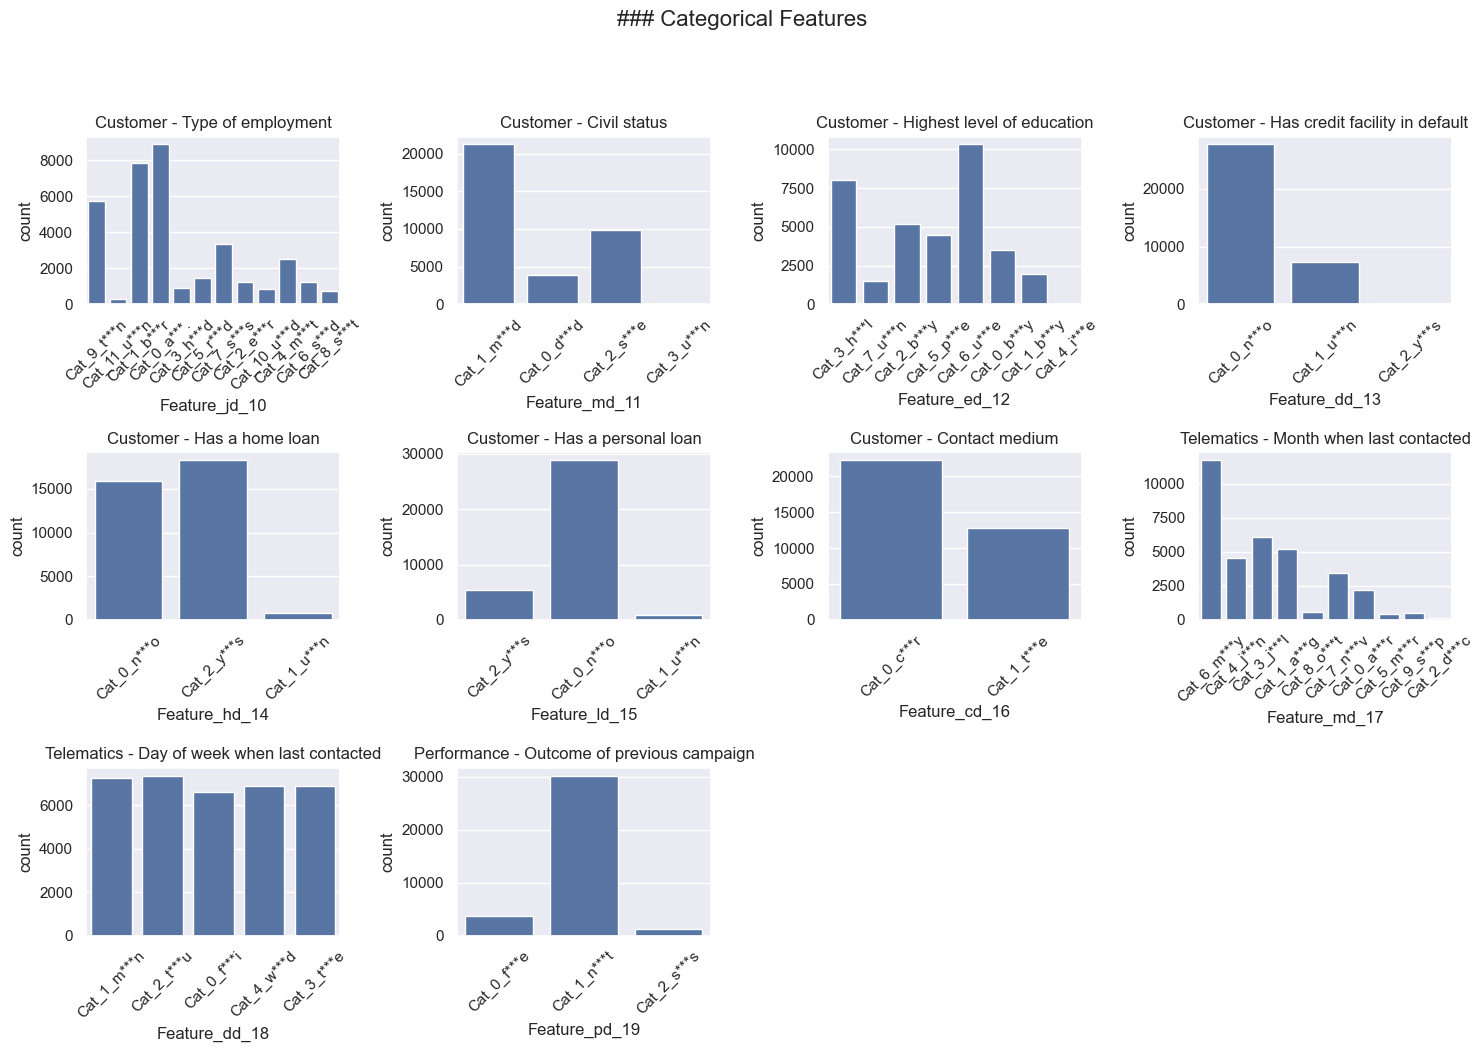

In [46]:
# Create mapping of feature names to descriptions
feature_descriptions = {
    'Feature_jd_10': 'Customer - Type of employment',
    'Feature_md_11': 'Customer - Civil status', 
    'Feature_ed_12': 'Customer - Highest level of education',
    'Feature_dd_13': 'Customer - Has credit facility in default',
    'Feature_hd_14': 'Customer - Has a home loan',
    'Feature_ld_15': 'Customer - Has a personal loan',
    'Feature_cd_16': 'Customer - Contact medium',
    'Feature_md_17': 'Telematics - Month when last contacted',
    'Feature_dd_18': 'Telematics - Day of week when last contacted',
    'Feature_pd_19': 'Performance - Outcome of previous campaign'
}

# Distribution of categorical variables
plt.figure(figsize=(15, 10))
plt.suptitle('### Categorical Features', size=16, y=1.05)

for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'{feature_descriptions[col]}', wrap=True)
plt.tight_layout()
plt.show()


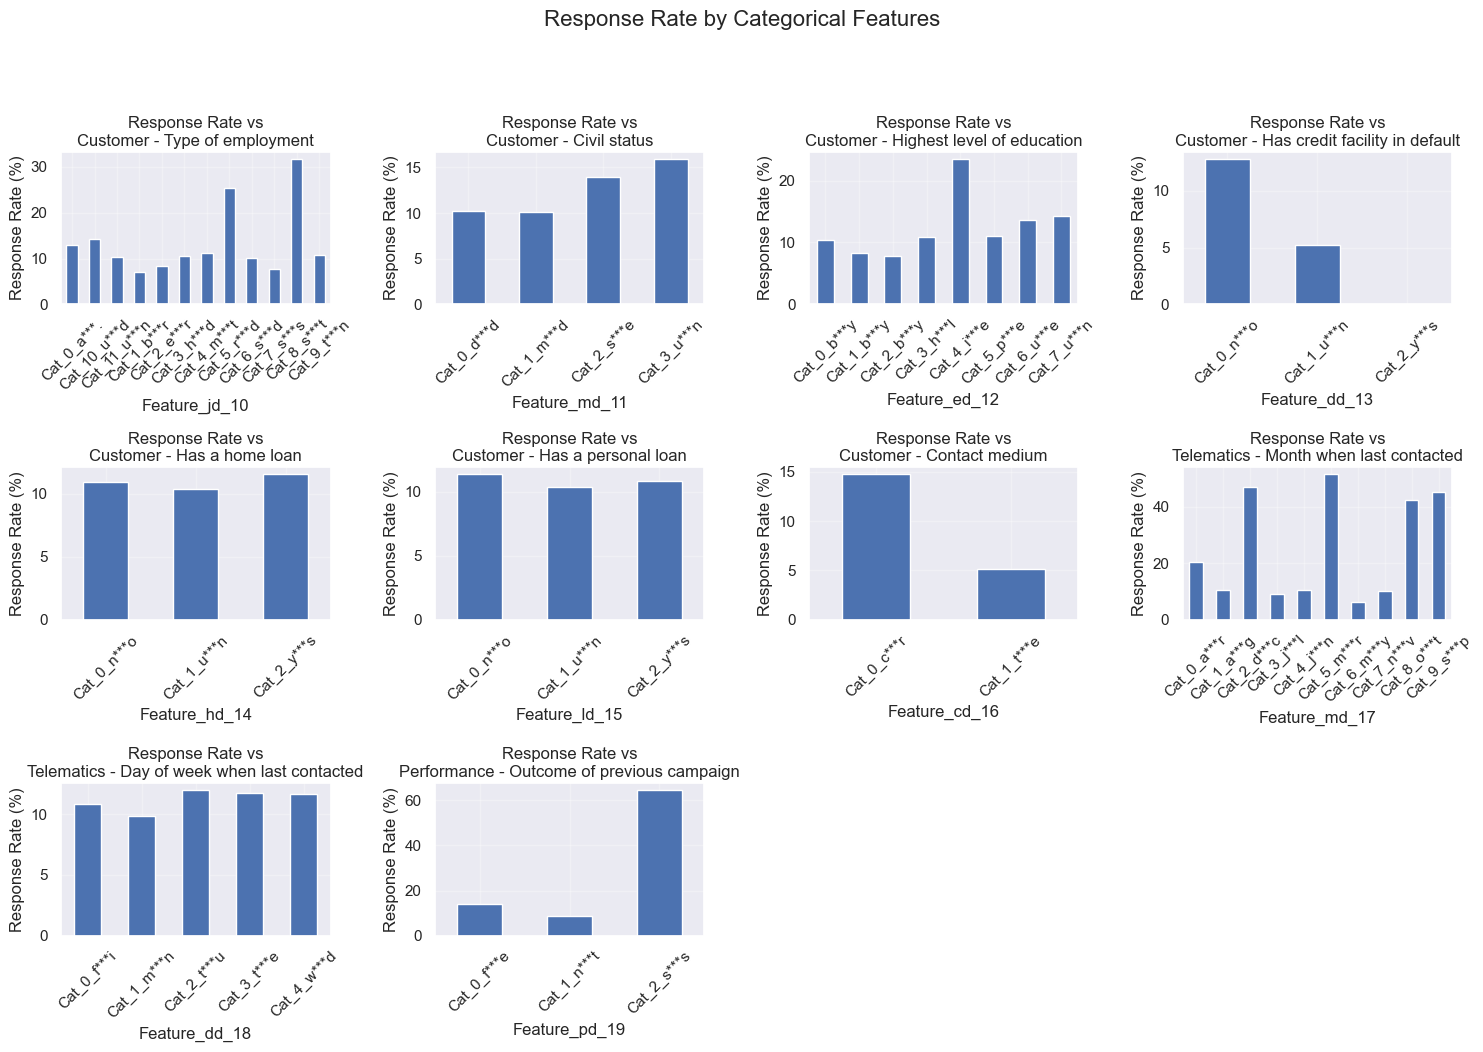

In [47]:
# Analyze categorical features vs response rate
plt.figure(figsize=(15, 10))
plt.suptitle('Response Rate by Categorical Features', size=16, y=1.05)

for i, (col, desc) in enumerate(feature_descriptions.items(), 1):
    plt.subplot(3, 4, i)
    
    # Calculate response rate percentage for each category
    response_by_category = df.groupby(col)['Response'].mean() * 100
    
    # Plot response rate by category
    response_by_category.plot(kind='bar')
    
    # Customize plot
    plt.title(f'Response Rate vs\n{desc}', wrap=True)
    plt.ylabel('Response Rate (%)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Interpretation of Categorical Features Analysis

## Key Findings by Category

### Customer Demographics
1. **Type of Employment (Feature_jd_10)**
   - Significant variation in response rates across job types
   - Highest response rates (~30%) from certain employment categories 
   - Some job types show response rates below 10%
   - Suggests targeted campaigns based on employment type could be effective

2. **Civil Status (Feature_md_11)**
   - Clear variation in response rates
   - Highest response (~15%) among certain marital status groups
   - Differences suggest family status influences decision-making

3. **Education Level (Feature_ed_12)**
   - Notable spike (~22%) for one education category
   - Most other education levels show 5-15% response rates
   - Education level appears to be a significant predictor

### Financial Status
4. **Credit Default Status (Feature_dd_13)**
   - Notable variation in response rates between categories
   - One category shows significantly higher response rate (~12%)
   - Pattern suggests this feature could be valuable for segmentation

5. **Home Loan Status (Feature_hd_14)**
   - Relatively consistent response rates (~10%)
   - Having a home loan doesn't strongly influence response

6. **Personal Loan Status (Feature_ld_15)**
   - Similar pattern to home loans
   - Minimal variation across categories
   - Loan status might not be a crucial targeting factor

### Campaign Execution
7. **Contact Medium (Feature_cd_16)**
   - Clear preference shown in response rates
   - One contact method significantly outperforms (~15% vs 5%)
   - Strong implications for campaign channel selection

8. **Month of Contact (Feature_md_17)**
   - Significant seasonal variation
   - Peak response rates (~45%) in certain months
   - Strong seasonality effect suggests optimal timing windows

9. **Day of Week (Feature_dd_18)**
   - Relatively consistent response rates (~10%)
   - Day of week has minimal impact on success

10. **Previous Campaign Outcome (Feature_pd_19)**
    - Dramatic difference based on previous outcome
    - Success in previous campaign (~60% response rate) is strongest predictor
    - Suggests high value in re-targeting previous successful contacts
